In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
# 1. Load your concatenated “news” data (only X, Y, Z)
X = np.load('X_news.npy')   # shape (N, 126)
y = np.load('y_news.npy')

# 2. Remap labels 23→0, 24→1, 25→2
unique_labels = np.unique(y)                     # array([23,24,25])
label_map     = {lbl: i for i, lbl in enumerate(unique_labels)}
y_mapped      = np.array([label_map[v] for v in y], dtype=np.int32)

# 3. One‑hot encode into 3 classes
num_classes = len(unique_labels)                 # 3
y_cat       = to_categorical(y_mapped, num_classes)

# 4. Reshape & preprocess
X = X.reshape(-1, 21, 6, 1).astype(np.float32)

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.2, stratify=y_mapped, random_state=42
)

# 6. Define CNN
model = Sequential([
    InputLayer(input_shape=(21, 6, 1)),
    Conv2D(32, (3,3), activation='relu', padding='same'), MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu', padding='same'), MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax'),
])

learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# 7. Train
model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50, batch_size=32
)

# 8. Save
model.save('cnn_hand_sign_models.h5')
print("Model trained and saved to cnn_hand_sign_models.h5")
# ——— 9. EVALUATION ———
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)
import numpy as np

# 1) Predict on X_test
y_pred_proba = model.predict(X_test)            # shape (n_samples, num_classes)
y_pred       = np.argmax(y_pred_proba, axis=1)  # discrete labels
y_true       = np.argmax(y_test,       axis=1)

# 2) Compute metrics
acc   = accuracy_score(y_true, y_pred)
prec  = precision_score(y_true, y_pred, average='macro')
rec   = recall_score(y_true, y_pred, average='macro')
f1    = f1_score(y_true, y_pred, average='macro')

print("\n— Evaluation on Test Set —")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}  (macro‑average)")
print(f"Recall   : {rec:.4f}  (macro‑average)")
print(f"F1‑Score : {f1:.4f}  (macro‑average)\n")

# 3) Detailed per‑class report
print("Per‑class breakdown:\n")
print(classification_report(y_true, y_pred, digits=4))





Epoch 1/50


d:\My Workspace\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.1290 - loss: 3.1299 - val_accuracy: 0.3563 - val_loss: 2.3457
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3357 - loss: 2.1526 - val_accuracy: 0.6245 - val_loss: 1.3384
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4678 - loss: 1.5661 - val_accuracy: 0.7280 - val_loss: 0.9572
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5892 - loss: 1.1628 - val_accuracy: 0.8084 - val_loss: 0.6950
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6333 - loss: 0.9483 - val_accuracy: 0.8238 - val_loss: 0.5796
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7147 - loss: 0.7677 - val_accuracy: 0.8238 - val_loss: 0.5029
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7540 - loss: 0.6767 - val_accuracy: 0.9157 - val_loss: 0.3631
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8053 - loss: 0.5597 - val_accuracy: 0.9157 - val_loss: 0.2965
Ep

Model trained and saved to cnn_hand_sign_models.h5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

— Evaluation on Test Set —
Accuracy : 0.9962
Precision: 0.9965  (macro‑average)
Recall   : 0.9962  (macro‑average)
F1‑Score : 0.9961  (macro‑average)

Per‑class breakdown:

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        10
           1     0.9091    1.0000    0.9524        10
           2     1.0000    1.0000    1.0000        10
           3     1.0000    1.0000    1.0000        10
           4     1.0000    1.0000    1.0000        10
           5     1.0000    1.0000    1.0000        10
           6     1.0000    1.0000    1.0000        10
           7     1.0000    1.0000    1.0000        10
           8     1.0000    1.0000    1.0000        10
           9     1.0000    1.0000    1.0000        10
          10     1.0000    1.0000    1.0000        10
          11     1.0000    1.0000    1.0000        10
          12     1.0000    1.0000 

In [15]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32
)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9916 - loss: 0.0378 - val_accuracy: 0.9885 - val_loss: 0.0278
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9806 - loss: 0.0640 - val_accuracy: 1.0000 - val_loss: 0.0154
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9920 - loss: 0.0379 - val_accuracy: 1.0000 - val_loss: 0.0137
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9839 - loss: 0.0437 - val_accuracy: 0.9885 - val_loss: 0.0207
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9884 - loss: 0.0342 - val_accuracy: 0.9962 - val_loss: 0.0156
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9871 - loss: 0.0442 - val_accuracy: 0.9962 - val_loss: 0.0190
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9901 - loss: 0.0450 - val_accuracy: 0.9962 - val_loss: 0.0147
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9891 - loss: 0.0353 - val_accuracy: 0.9923 - val_loss:

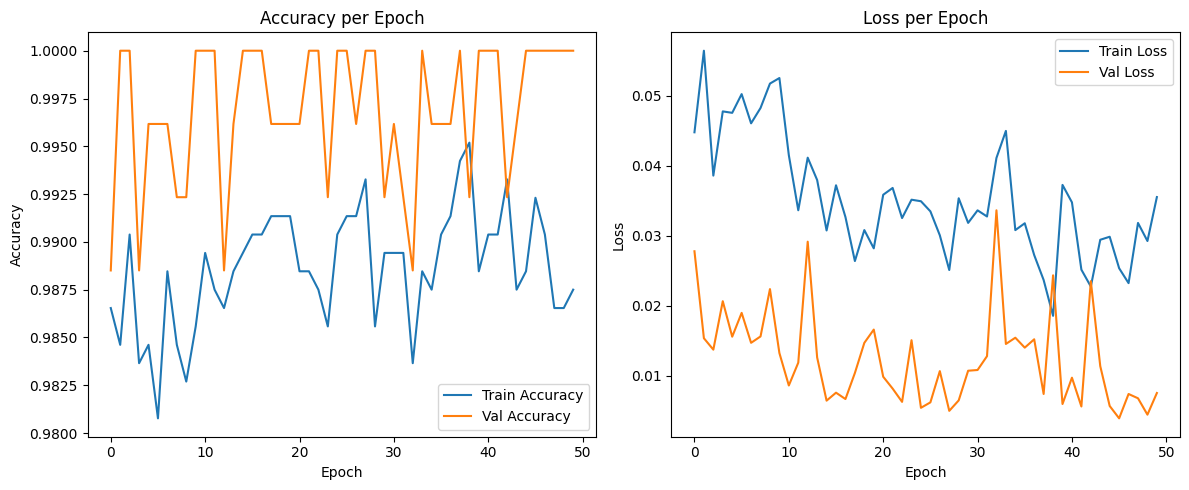

In [16]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
